In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Processing
### Categorical Features

In [3]:
df = pd.read_csv("../data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
df['Gender'].nunique()

2

In [8]:
print(pd.get_dummies(df['Gender'], prefix='Gender').head())
print(pd.get_dummies(df['Gender'], prefix='Gender').tail())

   Gender_Female  Gender_Male
0              0            1
1              0            1
2              0            1
3              0            1
4              0            1
      Gender_Female  Gender_Male
9995              1            0
9996              1            0
9997              1            0
9998              1            0
9999              1            0


## Feature Transformations

In [10]:
df['Height (ft)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [11]:
df.head()

,Gender,Height,Weight,Height (ft),Weight (100 lbs)
0,Male,73.847017,241.893563,6.153918,2.418936
1,Male,68.781904,162.310473,5.731825,1.623105
2,Male,74.110105,212.740856,6.175842,2.127409
3,Male,71.730978,220.042470,5.977582,2.200425
4,Male,69.881796,206.349801,5.823483,2.063498


In [14]:
df.describe().round(2)

,Height,Weight,Height (ft),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


### MinMax Normalization

In [18]:
df['Weight_mms'] = MinMaxScaler().fit_transform(df[['Weight']])
df['Height_mms'] = MinMaxScaler().fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (ft),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


### StandardScaler Normalization

In [19]:
df['Weight_ss'] = StandardScaler().fit_transform(df[['Weight']])
df['Height_ss'] = StandardScaler().fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (ft),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


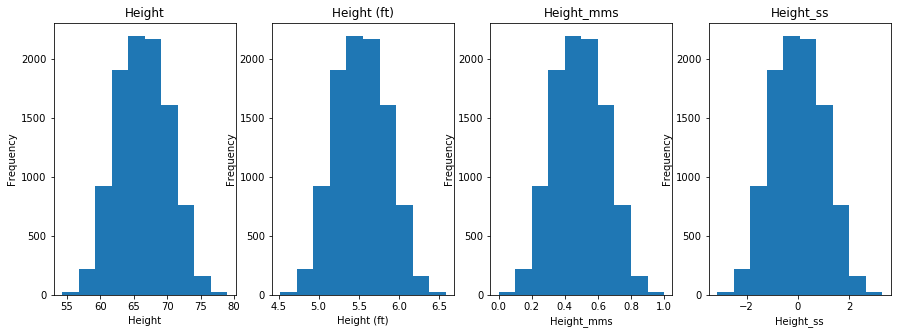

In [21]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (ft)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)